In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import cluster

# Problem 1

## 1-1 using cv2 to do cluster

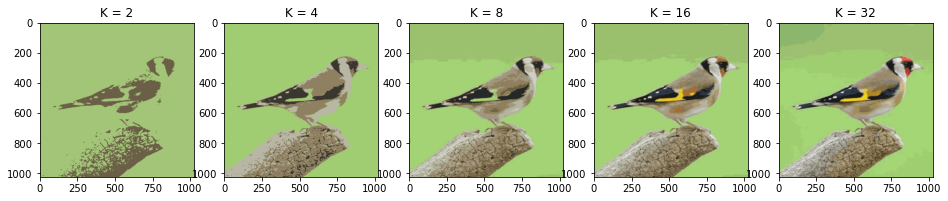

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-1 using sklearn to do cluster

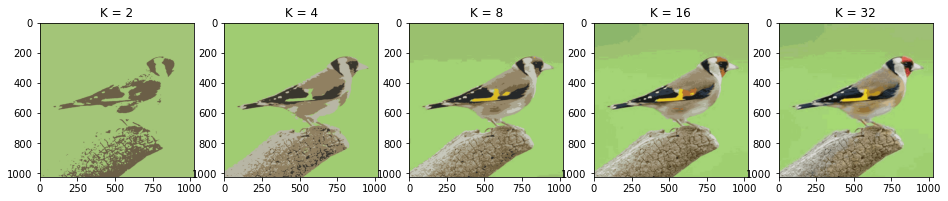

In [3]:
def km_clust(array, n_clusters):
    
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    values = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, values)

img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, c = img.shape

# convert to np.float32

Z = img
Z = Z.reshape(-1, 3)

# define criteria, number of clusters(K) and apply kmeans()
Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2 using sklearn to do cluster

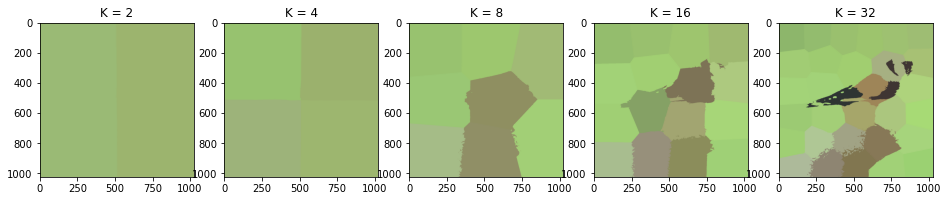

In [4]:
def km_clust(array, n_clusters):
    
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    values = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, values)

img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, c = img.shape

# convert to np.float32

Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

# define criteria, number of clusters(K) and apply kmeans()
Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()